<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Berezovski_Project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Seven
##Anna-Maria Berezovski
##CSC 687
##March 18, 2022

## Import and Prep Data

In [28]:
# some imports which will be needed
from numpy import mean
from numpy import std
from numpy import asarray
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [29]:
# I have the zip file uploaded so I must first unzip it
import zipfile
with zipfile.ZipFile('/content/facesDB.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [89]:
batch_size = 64
img_height = 48
img_width = 48

data_dir = '/content/facesDB'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 400 files belonging to 40 classes.
Using 320 files for training.


In [90]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 40 classes.
Using 80 files for validation.


In [91]:
class_names = train_ds.class_names
print(class_names)

['S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S2', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S3', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S4', 'S40', 'S5', 'S6', 'S7', 'S8', 'S9']


In [93]:
test_names = val_ds.class_names
print(test_names)

['S1', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S2', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S3', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S4', 'S40', 'S5', 'S6', 'S7', 'S8', 'S9']


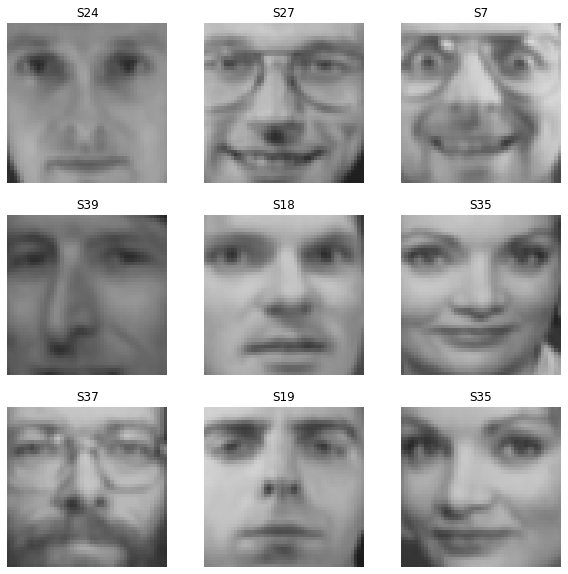

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [34]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 48, 48, 3)
(64,)


In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
normalization_layer = layers.Rescaling(1./255)

In [37]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

## Model 1

In [38]:
num_classes = len(class_names)

model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [39]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 64)       

In [41]:
epochs=300
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/300
5/5 [==============================] - 58s 66ms/step - loss: 3.7028 - accuracy: 0.0219 - val_loss: 3.6904 - val_accuracy: 0.0125
Epoch 2/300
5/5 [==============================] - 0s 19ms/step - loss: 3.6813 - accuracy: 0.0281 - val_loss: 3.6873 - val_accuracy: 0.0125
Epoch 3/300
5/5 [==============================] - 0s 18ms/step - loss: 3.6740 - accuracy: 0.0500 - val_loss: 3.6857 - val_accuracy: 0.0125
Epoch 4/300
5/5 [==============================] - 0s 19ms/step - loss: 3.6577 - accuracy: 0.0562 - val_loss: 3.6867 - val_accuracy: 0.0125
Epoch 5/300
5/5 [==============================] - 0s 19ms/step - loss: 3.6316 - accuracy: 0.0594 - val_loss: 3.6711 - val_accuracy: 0.0125
Epoch 6/300
5/5 [==============================] - 0s 21ms/step - loss: 3.5927 - accuracy: 0.0688 - val_loss: 3.6223 - val_accuracy: 0.0250
Epoch 7/300
5/5 [==============================] - 0s 18ms/step - loss: 3.5080 - accuracy: 0.1437 - val_loss: 3.5196 - val_accuracy: 0.0750
Epoch 8/300
5/5 [==

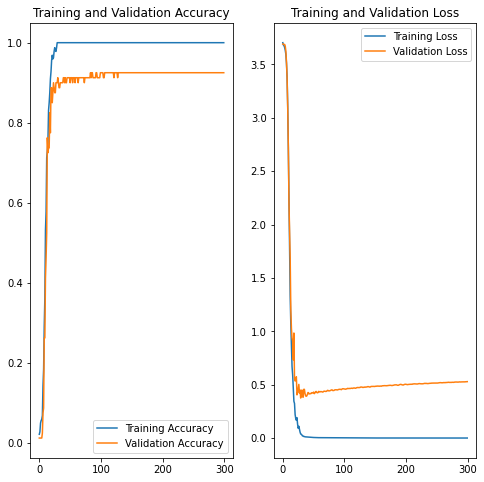

In [42]:
model1_acc = history.history['accuracy']
model1_val_acc = history.history['val_accuracy']

model1_loss = history.history['loss']
model1_val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model1_acc, label='Training Accuracy')
plt.plot(epochs_range, model1_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model1_loss, label='Training Loss')
plt.plot(epochs_range, model1_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

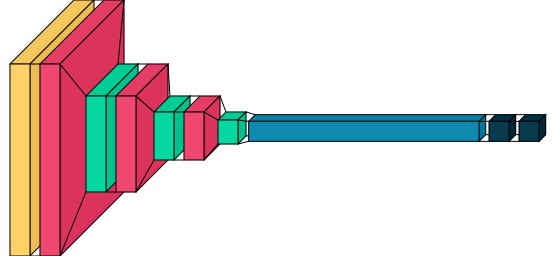

In [43]:
%pip install visualkeras
import visualkeras

# Draw model1's architecture

#visualkeras.layered_view(model1, to_file='output.png') # write to disk
#visualkeras.layered_view(model1, to_file='output.png').show() # write and show

visualkeras.layered_view(model1)

## Model 2 

In [44]:
num_classes = len(class_names)

model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [45]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                                 
 dense_9 (Dense)             (None, 40)                5160      
                                                      

In [47]:
epochs=300
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/300
5/5 [==============================] - 1s 62ms/step - loss: 4.1895 - accuracy: 0.0250 - val_loss: 3.8024 - val_accuracy: 0.0250
Epoch 2/300
5/5 [==============================] - 0s 21ms/step - loss: 3.7501 - accuracy: 0.0250 - val_loss: 3.6931 - val_accuracy: 0.0750
Epoch 3/300
5/5 [==============================] - 0s 25ms/step - loss: 3.6711 - accuracy: 0.0281 - val_loss: 3.6691 - val_accuracy: 0.0125
Epoch 4/300
5/5 [==============================] - 0s 25ms/step - loss: 3.6634 - accuracy: 0.0312 - val_loss: 3.6491 - val_accuracy: 0.0250
Epoch 5/300
5/5 [==============================] - 0s 32ms/step - loss: 3.6246 - accuracy: 0.1063 - val_loss: 3.6480 - val_accuracy: 0.0250
Epoch 6/300
5/5 [==============================] - 0s 24ms/step - loss: 3.6125 - accuracy: 0.0406 - val_loss: 3.6239 - val_accuracy: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 0s 21ms/step - loss: 3.5756 - accuracy: 0.0500 - val_loss: 3.6181 - val_accuracy: 0.0500
Epoch 8/300
5/5 

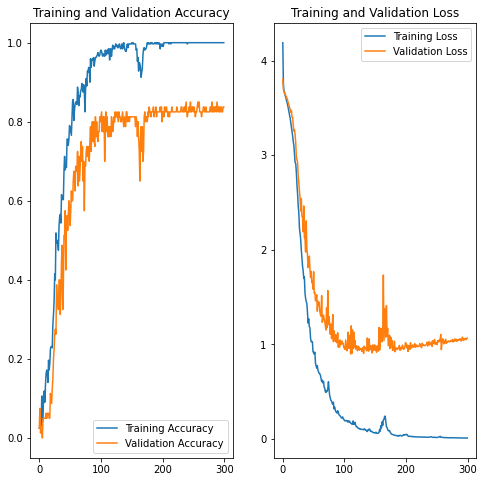

In [48]:
model2_acc = history.history['accuracy']
model2_val_acc = history.history['val_accuracy']

model2_loss = history.history['loss']
model2_val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model2_acc, label='Training Accuracy')
plt.plot(epochs_range, model2_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model2_loss, label='Training Loss')
plt.plot(epochs_range, model2_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

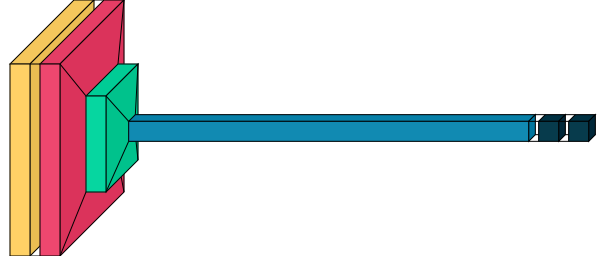

In [49]:
visualkeras.layered_view(model2)

## Model 3

In [50]:
num_classes = len(class_names)

model3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(256, 3, activation="relu", padding="same"),
  layers.Conv2D(256, 3, activation="relu", padding="same"),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation="relu", padding="same"),
  layers.Conv2D(128, 3, activation="relu", padding="same"),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  Dropout(0.5),
  layers.Dense(num_classes)
])

In [51]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 48, 48, 256)       7168      
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 256)       590080    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)       295040    
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 128)       147584    
                                                      

In [53]:
epochs=300
history = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
)

Epoch 1/300
5/5 [==============================] - 2s 287ms/step - loss: 3.7661 - accuracy: 0.0219 - val_loss: 3.6925 - val_accuracy: 0.0000e+00
Epoch 2/300
5/5 [==============================] - 1s 206ms/step - loss: 3.6934 - accuracy: 0.0344 - val_loss: 3.6924 - val_accuracy: 0.0250
Epoch 3/300
5/5 [==============================] - 1s 181ms/step - loss: 3.6917 - accuracy: 0.0250 - val_loss: 3.6927 - val_accuracy: 0.0125
Epoch 4/300
5/5 [==============================] - 1s 182ms/step - loss: 3.6864 - accuracy: 0.0344 - val_loss: 3.6931 - val_accuracy: 0.0000e+00
Epoch 5/300
5/5 [==============================] - 1s 185ms/step - loss: 3.6883 - accuracy: 0.0344 - val_loss: 3.6893 - val_accuracy: 0.0250
Epoch 6/300
5/5 [==============================] - 1s 184ms/step - loss: 3.6882 - accuracy: 0.0281 - val_loss: 3.6906 - val_accuracy: 0.0000e+00
Epoch 7/300
5/5 [==============================] - 1s 183ms/step - loss: 3.6859 - accuracy: 0.0375 - val_loss: 3.6934 - val_accuracy: 0.0000e+

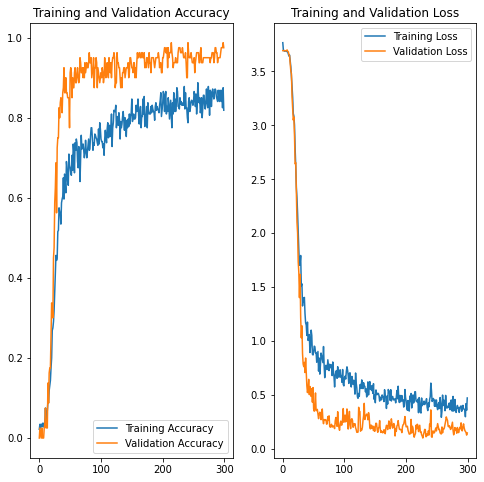

In [54]:
model3_acc = history.history['accuracy']
model3_val_acc = history.history['val_accuracy']

model3_loss = history.history['loss']
model3_val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model3_acc, label='Training Accuracy')
plt.plot(epochs_range, model3_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model3_loss, label='Training Loss')
plt.plot(epochs_range, model3_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

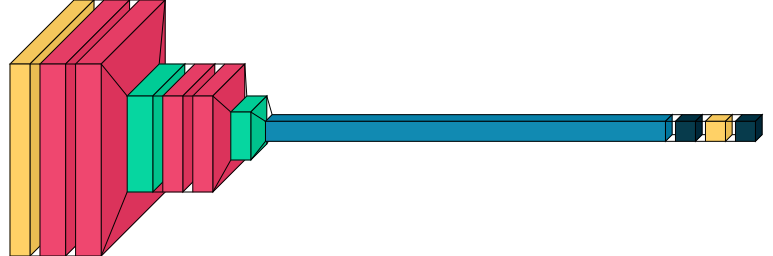

In [55]:
visualkeras.layered_view(model3)

## Conclusion

Text(0.5, 1.0, 'Model 3 Validation Loss')

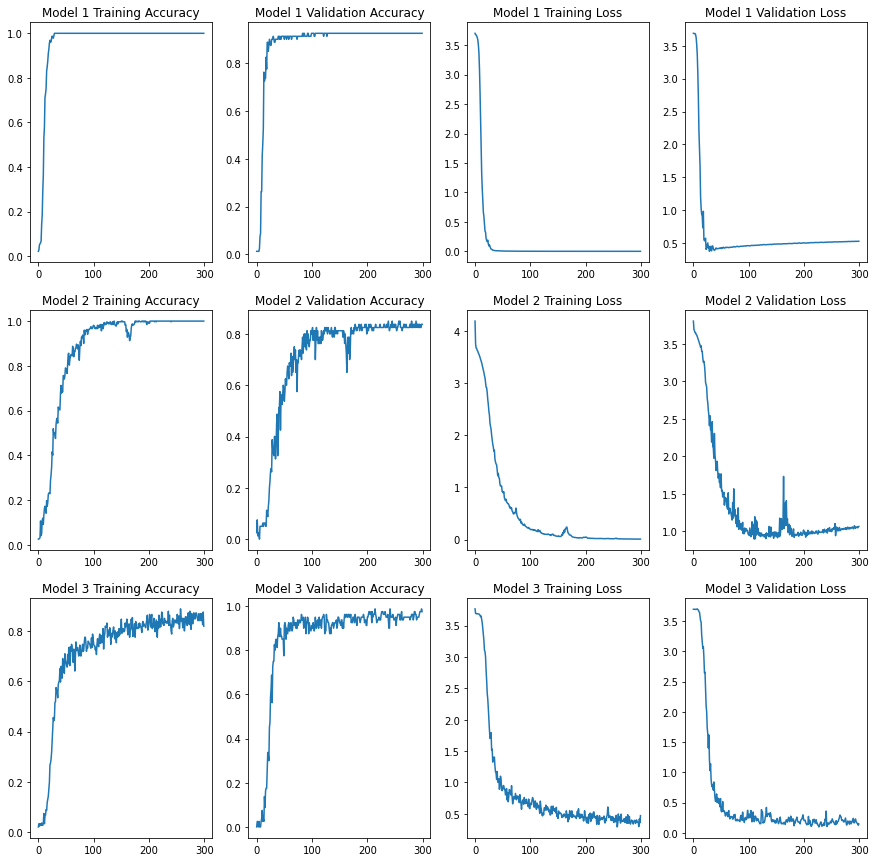

In [57]:
fig, axs = plt.subplots(3,4, figsize=(15,15))
# model 1
axs[0, 0].plot(epochs_range, model1_acc)
axs[0, 0].set_title('Model 1 Training Accuracy')
axs[0, 1].plot(epochs_range, model1_val_acc)
axs[0, 1].set_title('Model 1 Validation Accuracy')
axs[0, 2].plot(epochs_range, model1_loss)
axs[0, 2].set_title('Model 1 Training Loss')
axs[0, 3].plot(epochs_range, model1_val_loss)
axs[0, 3].set_title('Model 1 Validation Loss')

# model 2
axs[1, 0].plot(epochs_range, model2_acc)
axs[1, 0].set_title('Model 2 Training Accuracy')
axs[1, 1].plot(epochs_range, model2_val_acc)
axs[1, 1].set_title('Model 2 Validation Accuracy')
axs[1, 2].plot(epochs_range, model2_loss)
axs[1, 2].set_title('Model 2 Training Loss')
axs[1, 3].plot(epochs_range, model2_val_loss)
axs[1, 3].set_title('Model 2 Validation Loss')

# model 3
axs[2, 0].plot(epochs_range, model3_acc)
axs[2, 0].set_title('Model 3 Training Accuracy')
axs[2, 1].plot(epochs_range, model3_val_acc)
axs[2, 1].set_title('Model 3 Validation Accuracy')
axs[2, 2].plot(epochs_range, model3_loss)
axs[2, 2].set_title('Model 3 Training Loss')
axs[2, 3].plot(epochs_range, model3_val_loss)
axs[2, 3].set_title('Model 3 Validation Loss')


In [101]:
y = np.concatenate([y for x, y in val_ds], axis=0)

In [100]:
predictions = model1.predict(x=val_ds, steps=len(val_ds), verbose=0)

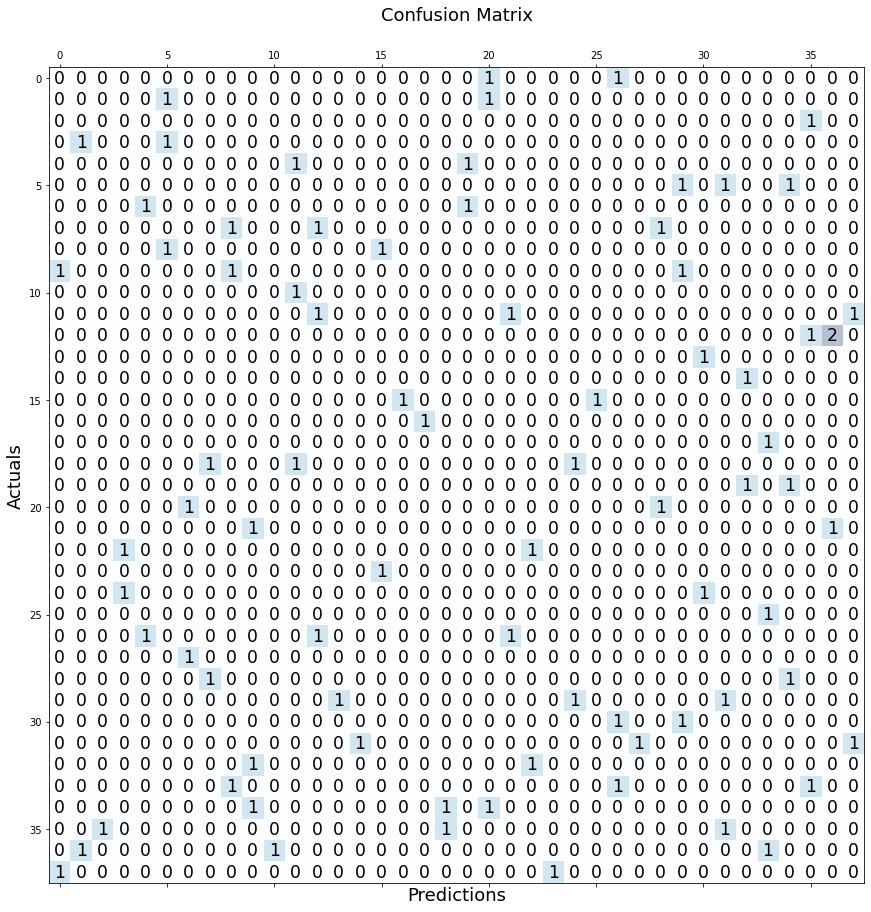

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true=y, y_pred=np.argmax(predictions, axis=-1))
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

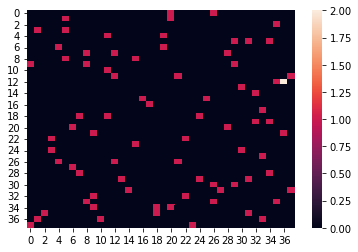

In [109]:
ax = sns.heatmap(cm)

In conclusion, the best model was the first model. In this model, teh data was first rescaled, converged and pooled 3 times, then flattened and went through two dense layers. THe total parameters for this model was 323, 784. This model was best since I think the other two models were over fitting the data. Both model 2 and model 3 had significanlty more paramters and thus trained the model much more than the first model. Because of this, I think that model 2 and 3 were over fit to the trianing data. Also, something to keep in mind with these results is that the data set is very small, especially for CNN models. The results of these same thee models can vary greatly each time they are run due to the size of the dataset. 